In [ ]:
!pip install geopandas
!pip install contextily

In [2]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Dato il nome di una regione (inserito dall'utente), calcolare la dimensione media della superficie delle sue province. Visualizzare poi sulla mappa la regione e le province, facendo in modo che le province con una superficie inferiore alla media siano colorate di verde mentre le altre siano colorate di rosso. Visualizzare anche i nomi delle province. Controllare che il nome della regione sia presente nel dataset: in caso negativo dare un messaggio di errore.

In [4]:
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Limiti01012021_g/Reg01012021_g')

In [5]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Limiti01012021_g/ProvCM01012021_g')

In [6]:
import matplotlib.pyplot as plt

Inserire il nome di una regione: Lombardia


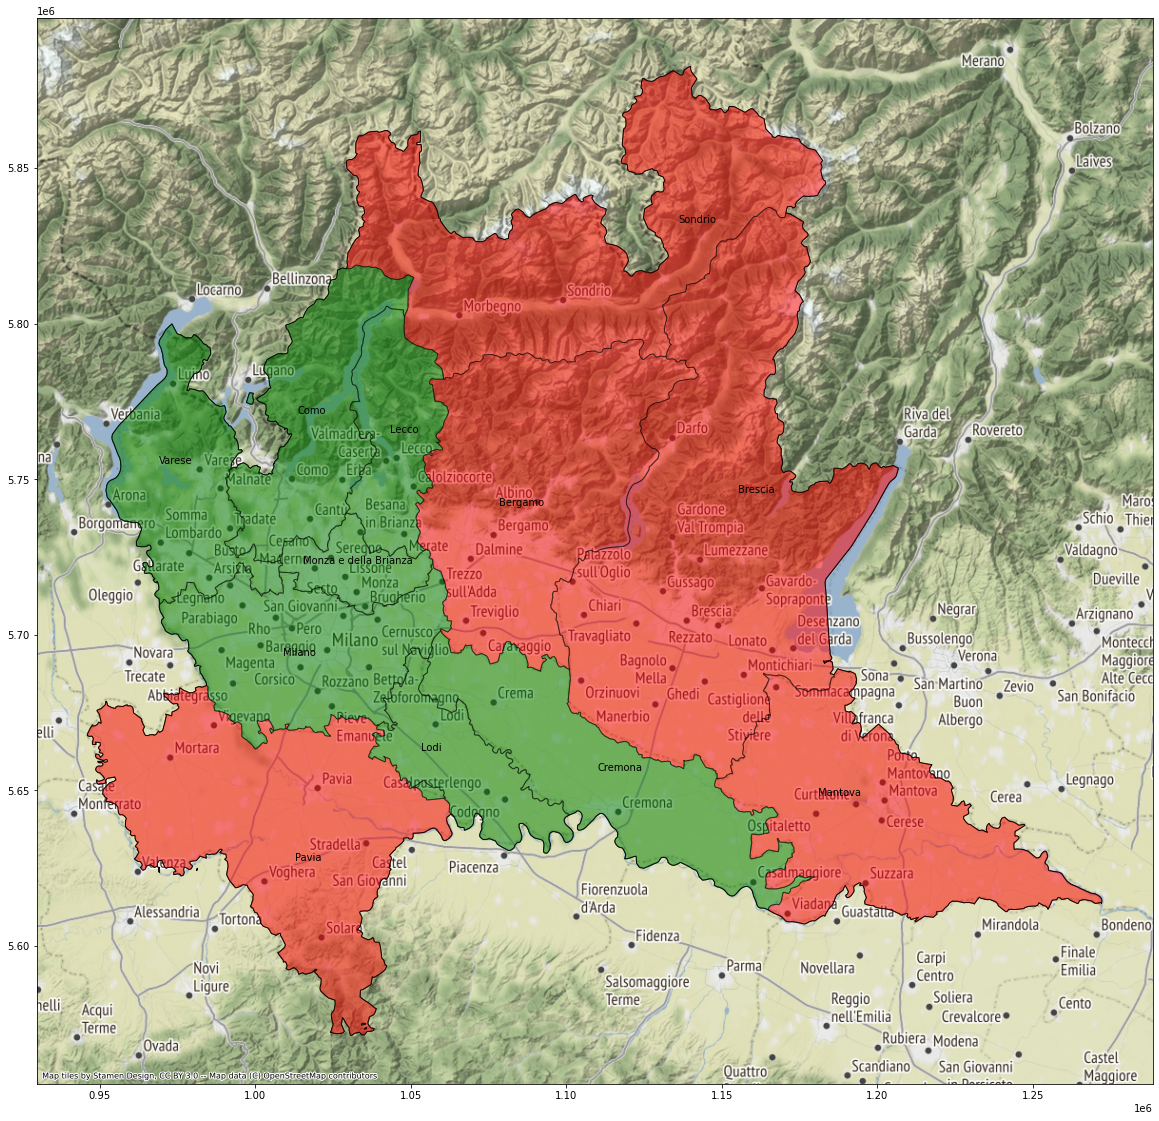

In [8]:
input_reg = input('Inserire il nome di una regione: ')

if input_reg in list(regioni.DEN_REG):
  regione = regioni[regioni['DEN_REG'] == input_reg]
  prov_reg = province[province.within(regione.geometry.squeeze())]
  media = prov_reg.Shape_Area.mean()
  prov_sup = prov_reg[prov_reg.Shape_Area >= media]
  prov_inf = prov_reg[prov_reg.Shape_Area < media]

  prov_reg3857 = prov_reg.to_crs(epsg = 3857)
  prov_reg3857["coords"] = prov_reg3857["geometry"].apply(lambda x: x.representative_point().coords[:])
  prov_reg3857["coords"] = [coords[0] for coords in prov_reg3857["coords"]]

  ax = regione.to_crs(epsg = 3857).plot(figsize = (20, 20), facecolor = "none", edgecolor = "k")
  prov_sup.to_crs(epsg = 3857).plot(ax = ax, facecolor = "red", alpha = 0.5, edgecolor = "k")
  prov_inf.to_crs(epsg = 3857).plot(ax = ax, facecolor = "green", alpha = 0.5, edgecolor = "k")
  contextily.add_basemap(ax)

  for idx, row in prov_reg3857.iterrows():
    plt.annotate(s = row["DEN_UTS"], xy = row["coords"], horizontalalignment = "center", color = "k")
else:
  print('Regione non presente nel dataset')

Cercare la provincia che ha la superficie maggiore. Visualizzare poi su una mappa la provincia con la superficie maggiore e tutte le province con cui confina. Colorare di verde la provincia più estesa e di giallo le province confinanti.

In [9]:
prov_sup_mag = province['Shape_Area'].max()
prov_sup_mag

7693245180.2

In [11]:
prov = province[province['Shape_Area'] == prov_sup_mag]
prov

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
89,5,20,90,0,90,Sassari,-,Sassari,SS,Provincia,905825.725858,7.693245e+09,"MULTIPOLYGON (((443843.913 4483390.792, 443817..."


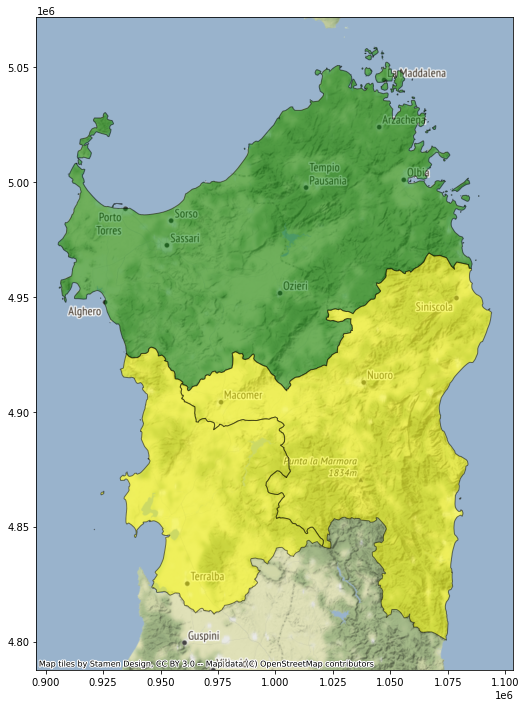

In [ ]:
ax = prov.to_crs(epsg = 3857).plot(figsize = (10, 12), facecolor = 'green', edgecolor = 'k', alpha = 0.5)
province[province.touches(prov.geometry.squeeze())].to_crs(epsg = 3857).plot(ax = ax, facecolor = 'yellow', edgecolor = 'k', alpha = 0.5)
contextily.add_basemap(ax)

Estrarre dalle province le province lombarde. Utilizzare poi il dataset così ottenuto per visualizzare le province attraversate da un corso d'acqua inserito dall'utente. Visualizzare infine le province e il corso d'acqua su una mappa. Controllare che il nome del corso d'acqua sia presente nel dataset: in caso negativo dare un messaggio di errore.

In [12]:
corsi_acqua = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas - Materiale esercizi/Corsi_acqua_Piano_di_Gestione.zip')

In [ ]:
# lombardia = regioni.loc[regioni['DEN_REG'] = 'Lombardia', 'geometry'.squeeze()]

In [13]:
lombardia = regioni[regioni['DEN_REG'] == 'Lombardia']
# lombardia = regioni.loc[regioni.DEN_REG=='Lombardia']

In [14]:
prov_lomb = province[province.within(lombardia.geometry.squeeze())]
prov_lomb

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
11,1,3,12,0,12,Varese,-,Varese,VA,Provincia,246016.658456,1.199334e+09,"POLYGON ((483071.566 5104606.092, 483258.471 5..."
12,1,3,13,0,13,Como,-,Como,CO,Provincia,260565.230534,1.279301e+09,"MULTIPOLYGON (((498077.207 5089780.202, 497614..."
13,1,3,14,0,14,Sondrio,-,Sondrio,SO,Provincia,464265.098278,3.194949e+09,"POLYGON ((595652.358 5163515.659, 596042.420 5..."
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."
15,1,3,16,0,16,Bergamo,-,Bergamo,BG,Provincia,310847.260446,2.754672e+09,"POLYGON ((585288.233 5104483.085, 585414.669 5..."
16,1,3,17,0,17,Brescia,-,Brescia,BS,Provincia,446387.375203,4.787545e+09,"POLYGON ((615296.024 5132340.876, 615374.024 5..."
17,1,3,18,0,18,Pavia,-,Pavia,PV,Provincia,449504.645144,2.967086e+09,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
18,1,3,19,0,19,Cremona,-,Cremona,CR,Provincia,365500.445250,1.769382e+09,"POLYGON ((542189.537 5037362.585, 542408.347 5..."
19,1,3,20,0,20,Mantova,-,Mantova,MN,Provincia,386685.850910,2.341796e+09,"POLYGON ((630538.958 5031669.589, 632819.864 5..."
96,1,3,97,0,97,Lecco,-,Lecco,LC,Provincia,181294.401343,8.056511e+08,"POLYGON ((532079.618 5104664.092, 533286.608 5..."


Inserire un corso d'acqua: Lambro (Fiume)


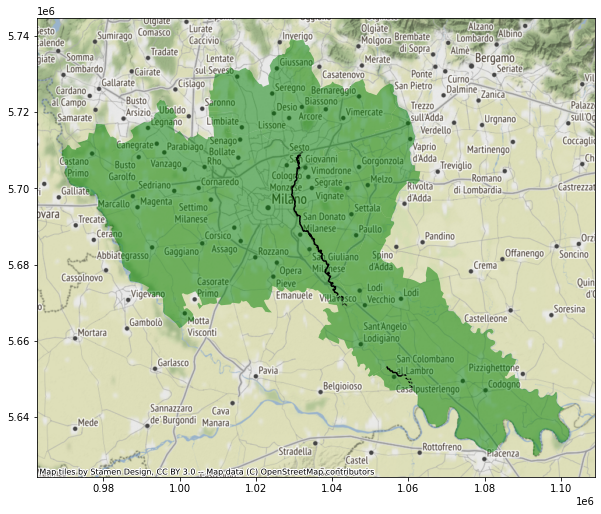

In [ ]:
input_corso = input("Inserire un corso d'acqua: ")

if input_corso in list(corsi_acqua.NOME):
  corso_acqua = corsi_acqua[corsi_acqua['NOME'] == input_corso]
  prov_corso = prov_lomb[prov_lomb.intersects(corso_acqua.unary_union)]
  ax = corso_acqua.to_crs(epsg = 3857).plot(figsize = (10, 10), color = 'k')
  prov_corso.to_crs(epsg = 3857).plot(ax = ax, facecolor = 'green', alpha = 0.5, linewidth = 4)
  contextily.add_basemap(ax)
else:
  print("Corso d'acqua non presente nel dataset")